<a href="https://colab.research.google.com/github/Divyesh-Kanagavel/HandsOnML-AI/blob/master/ML_classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are many classification ML algorithms. No algorithm works well in all possible scenarios. choosing the right algorithm requires information about the dataset , pitting multiple sensible models against one another and picking the right one.

Steps involved in machine learning model : \
1. Selecting features and collection of training samples
2. Choosing a performance metric
3. Choosing the classifier and optimization algorithm
4. Evaluation of the model using the metric on the data
5. Finetuning the model

Perceptron and Adaline learning algorithms using sci-kit learn library

In [2]:
#IRIS flowers dataset already available
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,(2,3)] # the petal length and width
y = iris.target
print(X.shape, y.shape)

(150, 2) (150,)


In [3]:
print('Class labels : ', np.unique(y))

Class labels :  [0 1 2]


We see that the class labels are encoded as integers. Although string labels can be trained using a machine learning algorithm,it is unnecessarily complex with huge memory footprint. It is wiser to integer encode the labels.

To evaluate how well the model performs on unseen data, a portion of training data is set aside as validation data and test data.there are tools in scikit learn to do this as well.


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


the shuffling of data before seggregration into train and test data is taken care of by the sklearn algorithm. the random_state parameters handles the pseudo random number generation. The stratify parameter makes sure that we have the same proportion of y labels as the original dataset in training and test dataset.

In [5]:
print('Counts per label in y', np.bincount(y))
print('Counts per label in y', np.bincount(y_train))
print('Counts per label in y', np.bincount(y_test))


Counts per label in y [50 50 50]
Counts per label in y [35 35 35]
Counts per label in y [15 15 15]


In [6]:
#Feature scaling using scikit-learn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Implementations in scikit learn support multiclass classification - one versus rest(OVR).

In [7]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)


Perceptron(eta0=0.1, max_iter=40, random_state=1)

the interface is similar to the perceptron implemented from scratch in previous chapter notebook.it has fit method to train the model and predict method to do forward pass.

In [8]:
y_preds = ppn.predict(X_test_std)

In [9]:
y_preds.shape

(45,)

In [10]:
print("Misclassified samples count is %d" %  (y_test!=y_preds).sum())

Misclassified samples count is 1


the scikit learn library also features a large number of metrics like accuracy to gauge the performance of a classifier. it can be used too for evaluation

In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy : %0.2f' % accuracy_score(y_test, y_preds))

Accuracy : 0.98


In [12]:
print("Accuracy : %0.2f" % ppn.score(X_test_std,y_test))

Accuracy : 0.98


In [13]:
#Visualize using plot_decisions function to view the decision boundaries
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx = None,resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  print(xx1.min(), xx2.min())
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, class_ in enumerate(np.unique(y)):
    plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')
  if test_idx:
           # plot all samples
           X_test, y_test = X[test_idx, :], y[test_idx]
           plt.scatter(X_test[:, 0], X_test[:, 1],
                       c='magenta', edgecolor='black', alpha=1.0,
                       linewidth=1, marker='o',
                       s=100, label='test set')

In [14]:
np.unique(y_test)

array([0, 1, 2])

-2.555787268814562 -2.438387213510368


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


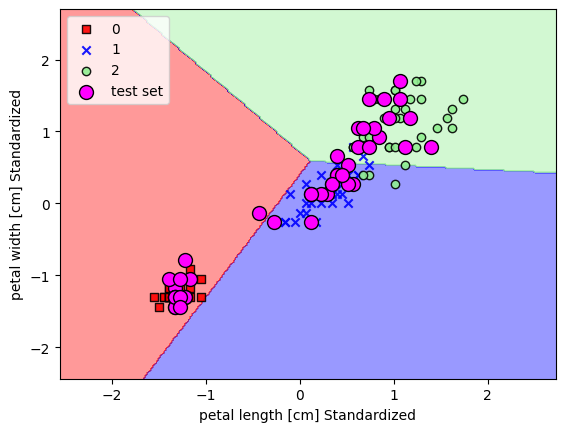

In [15]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=ppn, test_idx = range(105, 150))
plt.xlabel("petal length [cm] Standardized")
plt.ylabel("petal width [cm] Standardized")
plt.legend(loc='upper left')
plt.show()


Perceptron algorithm never converges on datasets that are not linearly separable. we need to resort to better algorithms for such cases. Even the above dataset containing three classes are not linearly separable. the sklearn uses some additional convergence functionalities to get a decent decision boundary. \
we ll see better algorithms for classification problem.

LOGISTIC REGRESSION

Perceptron will never converge on datasets which have no linearly separable data. So, now, we look at another simple yet powerful algorithm for classification called the logistic regression. \
Similar to perceptron and adaline, logistic regression is another linear model which works well on linearly separable dataset. Also, it can be extended to multi-class classification (OVR).

Odds ratio : the odds in favour of an event. mathematically can be defined as : \
Odds ratio = $\frac{p}{1-p}$, where p is probability of the event happening

The logit function (logarithm of the odds ratio) can then be defined conveniently as :\
logit(p) = $\log{\frac{p}{1-p}}$ \
log refers to natural logarithm.

the logits function takes as input in the range [0,1] and transform it to a value over the entire range of real values. \
logit(p(y=1|x) = $w_0x_0 + w_1x_1 + ... w_nx_n = w^T x$ \
To make a classification prediction, we need to have the opposite effect. So, we use the sigmoid activation function, which is given by : \
$\phi(z) = \frac{1}{1+\exp(-z)}$, where z = $w^T x$


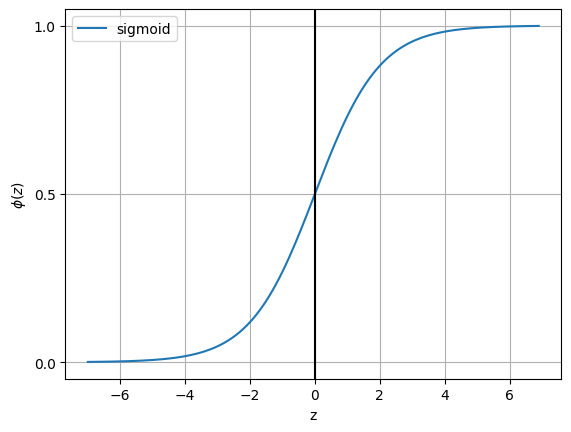

In [16]:
#sigmoid activation
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return (1. / (1+np.exp(-z)))
z = np.arange(-7.0,7.0,0.1)
phi = sigmoid(z)
plt.plot(z,phi, label="sigmoid")
plt.axvline(0.0,  color="black")
plt.xlabel("z")
plt.ylabel("$\phi(z)$")
plt.yticks([0.0,0.5,1.0])
plt.grid(True)
plt.legend()
plt.show()

The difference between logistic regression and adaline is that the activation function used before thresholding in adaline was a identity function $\phi(z) = z $, whereas for logistic function it was $\phi(z) = sigmoid(z)$

The logistic function returns the probability. p(y=class | x,w). Once we have the probability value, we can convert it to binary value of 0 or 1 using binary thresholding : \
   $ \hat{y}=
\begin{cases}
    1 & \text{if } \phi(z) \geq 0.5\\
    0,              & \text{otherwise}
\end{cases}$

With logistic regression,we also have an opportunity to quantify the prediction outcome with the probability values. getting binary prediction outcome along with the confidence score, makes it very popular and useful.

Cost function and learning weights: \
In the previous chapter, this cost function was used - a sum of squared error cost function.
$J(\bf{w}) = \sum\limits_i \frac{1}{2} (\phi (z^{(i)}) - y^{(i)})^{2}$



For the current logistic sigmoid activation function, the cost function which can be minimized using gradient descent is given by : \
$J(\bf{w}) = \sum \limits_{i=1}^{n} \left[ -y^{(i)} log(\phi(z^{(i)})) - (1 - y^{(i)}) log(1 - \phi(z^{(i)})) \right ]$ \
The derivation is not given here. pls refer to personal notebook for derivation. \
The function is basically negative log likelihood function -> it is numerically stable compared to likelihood function. [reduces numerical underflow where likelihood values are very low and escape gradient updates]. Another advantage is that it is easier to work with additions in differential calculus[to update gradients].

If we consider just one instance, the cost function can be simplified as follows: \
   $ J(\bf{w}) =
\begin{cases}
    -log(\phi(z)) & \text{if } y = 1\\
    -log(1-\phi(z)),              & \text y = 0
\end{cases}$

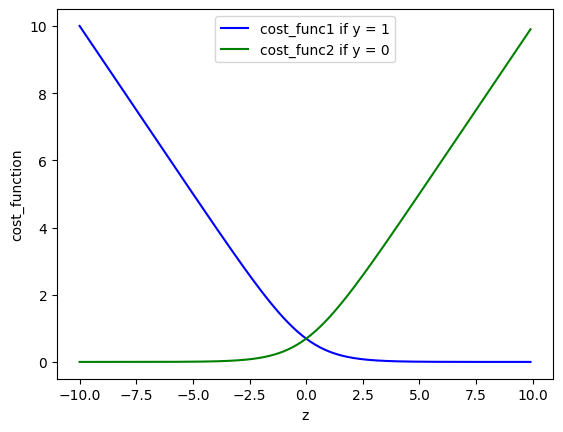

In [17]:
#plot the cost function
def cost_func1(z):
  return -np.log(sigmoid(z))
def cost_func2(z):
  return -np.log(1-sigmoid(z))

z = np.arange(-10.0, 10.0, 0.1)
phi_z = sigmoid(z)

c1 = cost_func1(z)
c2 = cost_func2(z)

plt.plot(z, c1, "b-", label = "cost_func1 if y = 1", )
plt.plot(z, c2, "g-",label = "cost_func2 if y = 0")
plt.xlabel("z")
plt.ylabel("cost_function")
plt.legend()
plt.show()


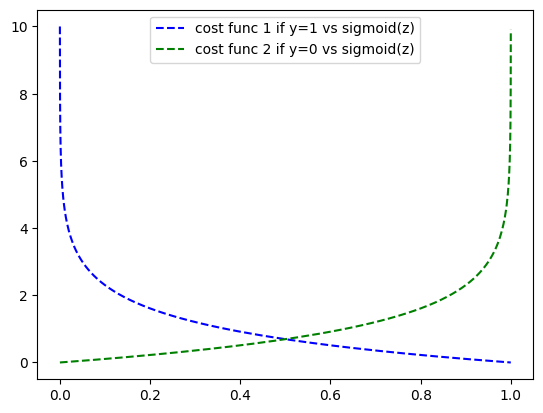

In [18]:
plt.plot(phi_z, c1, "b--", label = "cost func 1 if y=1 vs sigmoid(z)")
plt.plot(phi_z, c2, "g--", label = "cost func 2 if y=0 vs sigmoid(z)")
plt.legend()
plt.show()



In [19]:
#logistic regression training loop + forward pass code
#similar to adaline just the cost function is to be changed and thresholding range is now [0,1]
class LogisticRegressionGD(object):
  """ Logistic Regression for binary classification
  Parameters
  ----------
  eta : float
  Learning rate between 0.0 and 1.0
  n_iter : int
  Number of iterations for training
  random_state : int
  Seed for pseudo-random generator
  Attributes
  ----------
  w_ : 1d-array
  Weights of the model
  cost_ : List
  the cost function values
  """
  def __init__(self, eta = 0.1, n_iter=40, random_state=42):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state


  def fit(self, X, target):
    """ Method to update weights based on Gradient Descent algorithm
    Parameters
    ----------
    X : 2-D array
    Input training samples
    target : 1-D array
    Target labels
    """
    self.random_gen = np.random.RandomState(self.random_state)
    self.w_ = self.random_gen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):

      phi = self.activation(self.net_input(X))
      error = target - phi
      self.w_[1:] += self.eta * X.T.dot(error)
      self.w_[0] += self.eta * error.sum()
      cost = -target * np.log(phi) - (1-target) * np.log(1-phi)
      self.cost_.append(cost)
    return self
  def net_input(self,X):
    return self.w_[0] + X.dot(self.w_[1:])
  def activation(self, z):
    return (1/(1+np.exp(-z)))
  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0, 1.0, 0.0)



The above loop works for binary classification, so let us create a data subset with only flowers : iris-setosa and iris-versicolor (classes 0 and classes 1) \



In [20]:
X_train_01_subset = X_train_std[(y_train==0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]


In [21]:
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

-2.555787268814562 -2.438387213510368


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


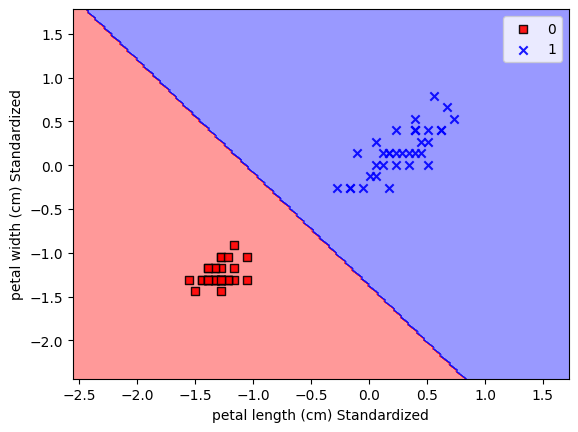

In [22]:
plot_decision_regions(X_train_01_subset, y_train_01_subset, lrgd)
plt.xlabel("petal length (cm) Standardized")
plt.ylabel("petal width (cm) Standardized")
plt.legend()
plt.show()

Using the sklearn logistic regression

-2.555787268814562 -2.438387213510368


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


<function matplotlib.pyplot.show(close=None, block=None)>

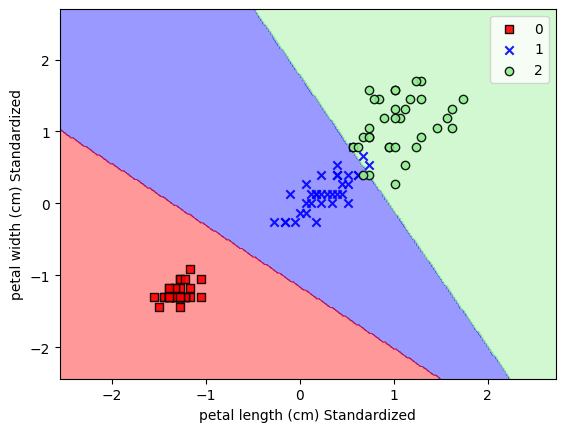

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train) # OvR classification - all the threee classes classified together
plot_decision_regions(X_train_std, y_train, lr)
plt.xlabel("petal length (cm) Standardized")
plt.ylabel("petal width (cm) Standardized")
plt.legend()
plt.show

C in the above class contstruction is hyperparameter related to regularization to curb overfitting.

In [24]:
lr.predict_proba(X_test_std[:5, :]) # method to get 3 class probabilities


array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17],
       [3.79431985e-06, 9.04401285e-01, 9.55949212e-02],
       [5.22212406e-05, 9.94209099e-01, 5.73867966e-03]])

In [25]:
#these are probabilities -> columnwise sum will add up to 1
lr.predict_proba(X_test_std[:5, :]).sum(axis=1)

array([1., 1., 1., 1., 1.])

In [26]:
# to get the index with highest score, call argmax
lr.predict_proba(X_test_std[:5, :]).argmax(axis=1)

array([2, 0, 0, 1, 1])

In [27]:
# doing the same with predict method
lr.predict(X_test_std[:5, :])

array([2, 0, 0, 1, 1])

sklearn's predict method expects a 2D array, hence if we have 1D array, needs to be reshaped to 2D array before calling predict method.

Overfitting : a common problem observed in machine learning . the model performs well on training data but its performance on unseen data is poor. \
If a model suffers from overfitting, it is usually said that it has high variance meaning there are way too many parameters and the model is too complex for the data.  Similarly if our model is too simple for the dataset,that is there are not enough parameters in the model to learn the patterns in the dataset, it is said to have high bias.

Variance vs bias: \
Variance measures the consistency (or variablity) of the model for a particular instance if the model were to be retrained multiple times on different subsets of the data. A model with high variance [low consistency] is very sensitive to randomness in the data. In contrast bias measures the systematic error in predictions of the model irrespective of the randomness.

One way of solving the bias-variance trade-off is to have a highly complex model and then tune it using regularization. Regularization is higly effective in tackling collinearity - highly correlated features, filter out noise from data and prevent overfitting. Regularization introduces additional information (bias) into model penalizing the weights of the model not allowing it to take extreme values. L2 regularization is one common form of regularization. \
$\frac{\lambda}{2}||\bf{w}||^2 = \frac{\lambda}{2} \sum \limits_{j=1}^{m} w_j^{2}$, where $\lambda$ is the regularization parameter.


The parameter C used in Logistic Regression class comes from support vector machines algorithm actually and is related to the parameter $\lambda$. it is in fact the inverse of the $\lambda$ parameter. through C , we can regulate our model weights and thus control the bias and variance of the model.

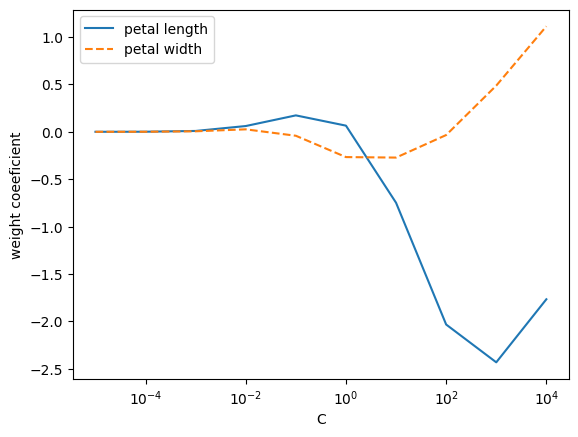

In [28]:
weights, params = [], []
for c in range(-5,5):
  lr = LogisticRegression(C = 10.**c, random_state=1)
  lr.fit(X_train_std,y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], label='petal width', linestyle='--')
plt.ylabel("weight coeeficient")
plt.xlabel("C")
plt.legend(loc="best")
plt.xscale("log")
plt.show()


We ll next see another classification algorithm - Maximum margin classifier a.k.a Support Vector Machines. \
Perceptron, adaline and logistic regression try to minimize the misclassification errors , support vector machines try to maximise the margin of classification. Margin is the distance between hyperplane (decision region) and the samples closest to decision boundary [also called support vectors]. \
The model with large classification margin tend to generalize well to new samples , while those with small margin overfit easily.


Let the hyperplane be : \
$w_0 + w^T x = 0$ \
let us take two hyperplanes parallel to this hyperplane, \
$w_0 + w^T x_{pos} = 1$ \
$w_0 + w^T x_{neg} = -1$ \
Subtracting the two equations, \
$w^T (x_{pos} - x_{neg}) = 2$ \
Normalizing the equation with the norm of the weight vector, we get : \
$\frac{w^T (x_{pos} - x_{neg})}{||w||} = \frac{2}{||w||}$. \
The left side of the equation can be interpreted as distance between positive and negative hyperplane and thus the margin of classification. \
now, the objective function can be formulated with the condition that margin is maximised , i.e the term $\frac{2}{||w||}$ is maximuzed on condition that the samples are correctly classified. \
$w_0 + w^T x^{(i)} \geq 1 , if y^{(i)} = 1 \\
w_0 + w^T x^{(i)} \leq 1 , if y^{(i)} = -1$ \
this can be compactly written as \
$y^{i} (w_0 + w^T x^{(i)}) \geq 1$ \
And it is easier to minimize the term $\frac{1}{2} ||w||^2$ using quadratic programming.



Dealing with non-linearly separable cases with slack variable $\xi $. \
The motivation of introducing the slack variable is to relax the linear constraints for convergence to a minima with the cost penalization to have maximum margin. it allows some misclassifications in case of non-linearly separable data to preseve the maximum margin and have as many labels correctly classified as possible and to have convergence to minima of the optimum function.\
$w_0 + w^T x^{(i)} \geq 1-\xi ^{(i)} \ \text{if} \ y^{(i)} = 1, \\
w_0 + w^T x^{(i)} \leq -1+\xi ^{(i)} \ \text{if}  \ y^{(i)} = -1.$ \

The constraints now change as : \
$\frac{1}{2} ||w||^2 + C ( \sum_i \xi ^{(i)}$)



C is the regularization parameter, higher c, meaning we care about misclassifications and hence higher penalties on misclassified samples and thus the model tries to minimize misclassifications while mainitaing low margin if requried. \
Lower c, meaning we don't care much about misclassifications and hence lower penalties on misclassified samples and thus model tries to maximize margin allowing some misclassifications in the process if needed

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC(kernel='linear', C = 1.0, random_state=42)
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=42)

-2.555787268814562 -2.438387213510368


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


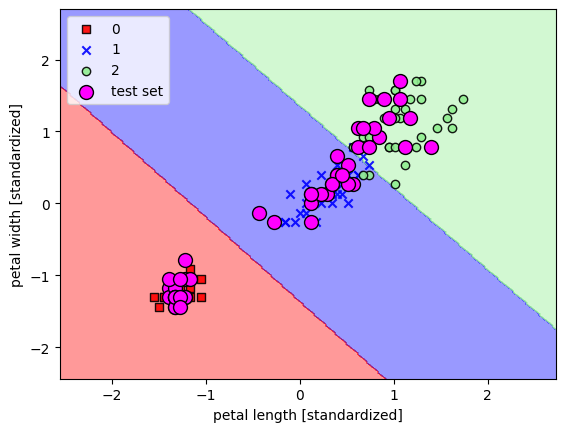

In [31]:
plot_decision_regions(X_combined, y_combined, classifier=svc, test_idx = range(100,150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

In practical tasks,both linear logistic regression and linear support vector machines yield similar results. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs, which mostly care about the points that are closest to the decision boundary (support vectors). \
Logistic regression model is easier to implement and is easy and can be updated faster in live streaming applications.

The scikit-learn library's Perceptron and LogisticRegression classes, which we used in the previous sections, make use of the LIBLINEAR library, which is a highly optimized C/C++ library. \
 Similarly, the SVC class that we used to train an SVM makes use of LIBSVM, which is an equivalent C/C++ library specialized for SVMs. The scikit learn library offers alternate implementations via the SGDClassifier which provides online learning support through partial_fit().

In [32]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron') # perceptron classifier
lr = SGDClassifier(loss='log') # logistic regression
svm = SGDClassifier(loss='hinge') # support vector machines

Solving non-linear problems using support vector machines (the kernel trick). \
the SVM algorithm can be tweaked to make it solve non-linear problems [kernelization].

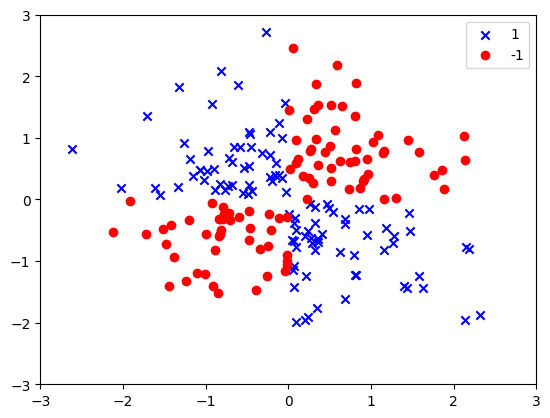

In [33]:
#Kernel method for solving linearly inseparable data
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1,0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1,0], X_xor[y_xor == -1,1], c='r', marker='o', label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc="best")
plt.show()




XOR is a non-linear operator - cannot be separated by a linear hyperplane and requires a non-linear decision boundary and hence cannot be classified correctly by logistic or linear svm.

The basic idea behind kernelized SVM is to project this non-linear data in 2D to a higher dimension by a mapping function $\phi$ where it becomes linearly separable through a high dimensional hyperplane. \
for example, a two dimensional dataset can be mapped to a three dimensional feature space as follows:
$\phi(x_1,x_2) = (z_1,z_2,z_3) = (x_1,x_2,x_1^{2} + x_2^{2})$

The points in lower dimensional space have to be mapped to a higher dimensional space by a function $\phi$, and this is computationally expensive, if the dimensionality is high. So, we resort to kernel trick to reduce the computations and still achieve the results intended. \
Optimizing a support vector machine model involves solving a quadratic programming problem which involved computation of dot product $(x^{(i)})^{T} x^{j}$. With non-linear mapping it becomes $\phi (x^{(i)})^{T} \phi (x^{(j)})$. \
In order to save this computationally expensive step , dot product, we calculate the kernel function : \
$\kappa (x^{(i)}, x^{(j)}) = exp (\frac{-||x^{(i)}-x^{(j)}||^2}{2\sigma ^2})$, \
$\gamma = \frac{1}{2\sigma ^2}$ is a free parameter which is to be optimized.

The kernel can be interpreted as a similarity score which measures how close two samples are. \
the negative sign converts the distance into similarity and the exponential makes sure that the values range between 0 and 1 [just like dot product similarity]. 1 for completely similar and 0 for very dissimilar.

-4.241267340069072 -2.987568914600893


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


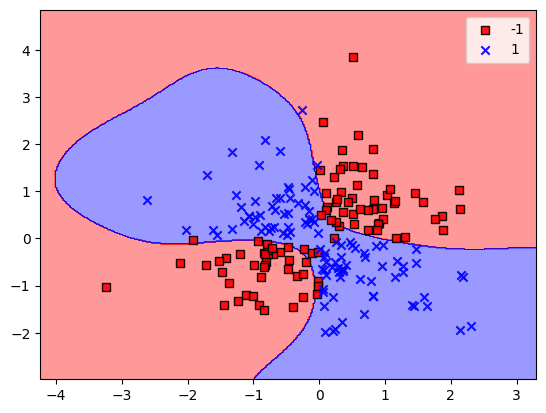

In [34]:
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc="best")
plt.show()

the parameter $\gamma$ which has been set to 0.1 here is a free parameter which decides the reach or influence of the training samples. Higher $\gamma$ implies a tighter decision boundary.

-2.555787268814562 -2.438387213510368


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


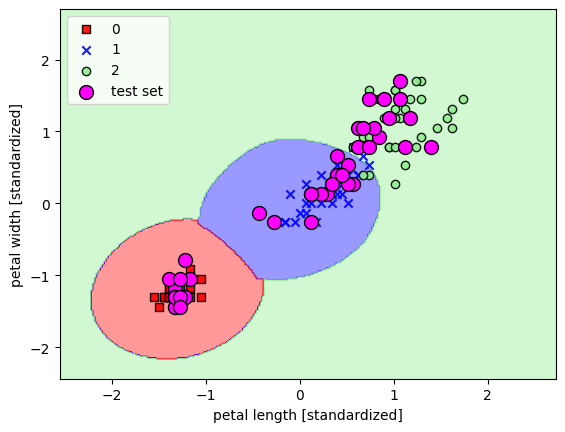

In [35]:
svm = SVC(kernel="rbf", gamma=2, random_state=1, C = 1.0)
svm.fit(X_train_std, y_train) # the iris flower dataset
plot_decision_regions(X_combined, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


Gamma plays a very important role in deciding the decision boundary ,higher $\gamma$ leads to stricter decision boundary which might lead to generalization errors.

DESCISION TREE LEARNING

Decision tree classifiers -> very good for interpretability. Based on the features in the training set, the decision tree finds asnwers to series of questions to find the label . \
the idea is to start at the root node and keep splitting data into halves based on the feature which results in highest Information Gain (IG). We keep iteratively splitting the tree this way and try to seggregrate the data into classes. could result in a very deep tree, hence pruning is employed to keep a check on the depth of the tree.

Information Gain IG(Dp,f) = I(Dp) - $\sum_{j=1}^{m}\frac{N_j}{N_p}I(D_j)$. \
I is the impurity measure, D is the dataset of the node i. The information gain is the difference between imputity measures of parent node and children node. Lower the impurity of children, greater the information gain.

There can be multiple children node, but for simplicity and to reduce combinatorial search space, binary trees are used -> 2 children at most per node. \
$IG(Dp,f) =  I(Dp) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$

Three commonly used splitting criteria used are Gini Impurity (IG), Entropy impurity (IH) and classificaion error (IE). They are defined as follows:\
$I_H(D_p) = - \sum_{i=1}^{c}p(i|t) \times \log_{2}{p(i|t)}$ .\
In case of uniformly distributed or close to uniformly distributed probabilities, the entropy score is high since there are impurities and we cannot split with certainty. If one class has 1 probability and other zeros, entropy is zero. \
$I_G(D_p) = \sum_{i=1}^{c}p(i|t) \times (1-p(i|t)) = 1 - \sum_{i=1}^{c}p(i|t)^2$. \
Same goes for Gini impurity -> more uniformly distributed the probability distribution, greater the enrtopy, else lesser the entropy. \
$I_E(D_p)$ = 1 - max{p(i|t)}. \
This metric is suitable for tree pruning but is insensitive to class probability changes. Hence, both Gini and entropy impurity measures work well for splitting the tree into children nodes. \


Visualization of the three impurity metrics:

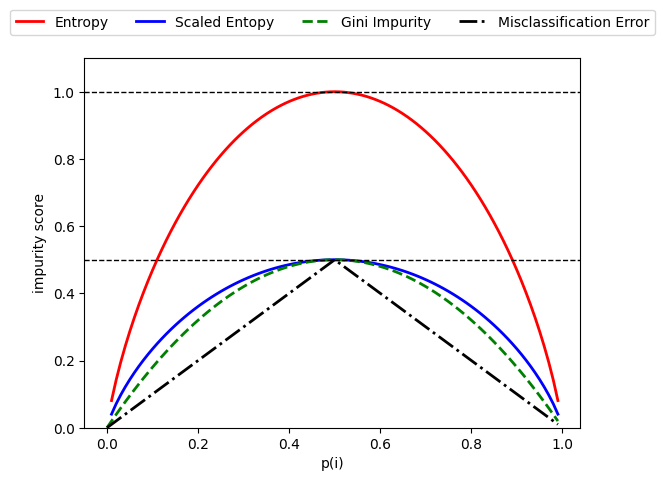

In [36]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
  return p * (1-p) + (1-p) * (1-(1-p))
def entropy(p):
  return -p * np.log2(p) - (1-p) * np.log2((1-p))
def error(p):
  return 1-np.max([p,1-p])

x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p!=0 else None for p in x]
scaled_ent =[0.5*e if e else None for e in ent]

err = [error(p) for p in x]
fig = plt.figure()
ax = plt.subplot(111)
labels = ['Entropy', 'Scaled Entopy', 'Gini Impurity', 'Misclassification Error']
linespaces = ['-', '-', '--','-.']
colors = ['red', 'blue', 'green', 'black']
for idx, impurities in enumerate([ent, scaled_ent, gini(x), err]):
  line = ax.plot(x, impurities,label=labels[idx], linestyle=linespaces[idx], lw = 2, color=colors[idx])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1,color='k',linestyle='--')
plt.ylim([0,1.1])
plt.xlabel("p(i)")
plt.ylabel("impurity score")
plt.show()








gini impurity is somewhere between entropy and misclassification. infact scaled entropy is very close to gini impurity

Building a decision tree : \
A decision tree can build complex decision boundaries by dividing the feature space into rectangular boxes. But, it can quickly overfit the data, so the tree needs to be pruned. Feature scaling may be employed, but it is not compulsory for decision trees as they can work well with non-scaled features as well.

0.0 -0.9


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


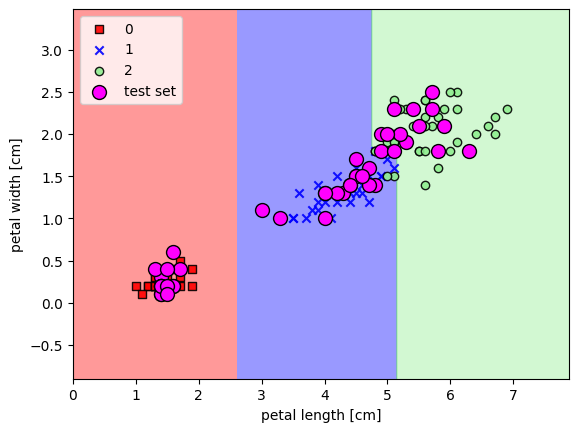

In [37]:
#entropy imputiry
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion="entropy", max_depth=4,random_state=42)
tree1.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree1, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel("petal width [cm]")
plt.legend(loc="upper left")
plt.show()



0.0 -0.9


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


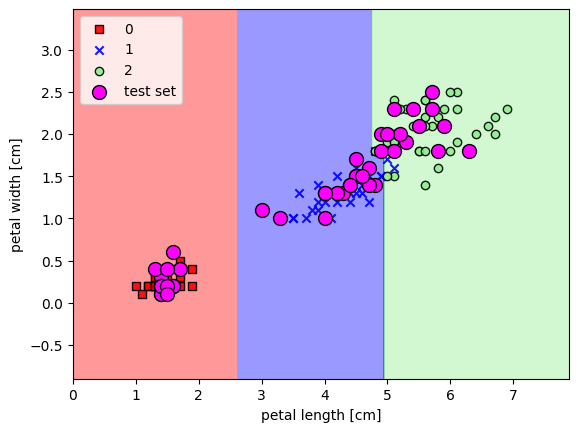

In [38]:
# gini impurity
tree1 = DecisionTreeClassifier(criterion="gini", max_depth=4,random_state=42)
tree1.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree1, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel("petal width [cm]")
plt.legend(loc="upper left")
plt.show()

Both gini and entropy impurity indices give similar performances. Since trees can be easily visualized graphically, there are librarires to export the graphical representation of learned trees to file after training f.e graphviz

In [39]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz


In [40]:
dot_date = export_graphviz(tree1,out_file=None, feature_names=['petal length', 'petal width'], class_names=['setosa', 'versicolor', 'virginica'],filled=True, rounded=True)

In [41]:
graph = graph_from_dot_data(dot_date)
graph.write_png("tree1.png")

True

0.0 -0.9


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


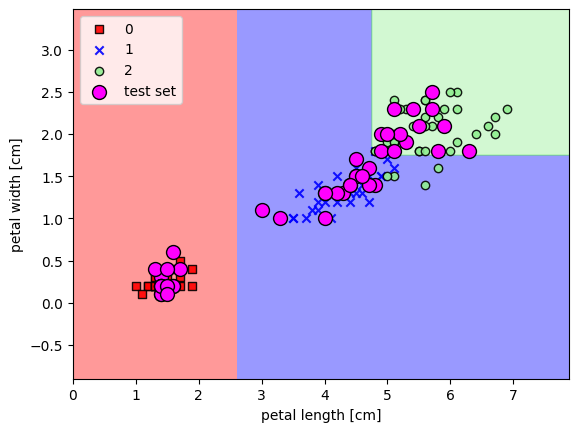

In [42]:
#let us try with pruning i.e depth = 3 instead of 4
tree_depth3 = DecisionTreeClassifier(criterion="gini", max_depth=3,random_state=42)
tree_depth3.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_depth3, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel("petal width [cm]")
plt.legend(loc="upper left")
plt.show()

In [43]:
dot_date = export_graphviz(tree_depth3,out_file=None, feature_names=['petal length', 'petal width'], class_names=['setosa', 'versicolor', 'virginica'],filled=True, rounded=True)

In [44]:
graph = graph_from_dot_data(dot_date)
graph.write_png("tree1_depth3.png")

True

Combining trees to make a random forest:

Random forests -> good classification performance. \
Multiple trees with their high variance are combined together to have an average which leads to lesser variance and better generalization less susceptible to overfitting.

Random forest algorithm: \
Draw a random bootstrap sample of size n from training set. (with replacement) \
Grow decision tree from the bootstrap sample. At each node: \
Randomly select d features without replacement. \
Split the node using the feature that provides the best split according to objective function. \
Repeat the two previous steps k times \
Aggregate the predictions by each tree to assign the label by majority vote.

Random forests don't offer same level of interpretability as decision trees. \
But advantages include not needing to prune the trees as the aggregate prediction will basically mitigate the noise introduced due to individual trees, there is no need to tune hyperparameters specifically. the only hyperparameter to worry about is the number of trees used.

Larger number of trees -> better random forest prediction but at expense of computational costs. \
The bootstrap sample n and features d can also be tuned. Larger the sample, higher the possibity of trees overfitting data, whereas low n means diverse trees with possibility of high bias. The features d can be chosen as $\sqrt{m}$,where m is the number of features.

0.0 -0.9


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


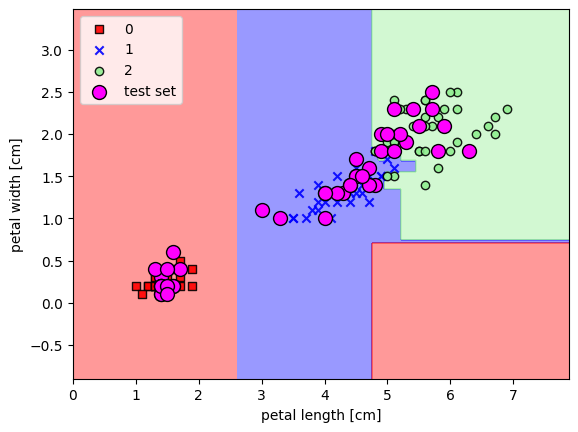

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion="gini",n_estimators=5, random_state=42, n_jobs=4)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

n_jobs here refers to parallelization of model training by leveraging the multiple cores in the system.

K-nearest neighbours - Lazy learning algorithm \
called lazy learning algorithm because there is no underlying function which is used to learn the patterns in data,but it just tries to memorize the data completely.

Classification models can be classified into parameteric and non-parametric model -> Parametric model means that the model can be described by a fixed set of parameters which are learned from the dataset f.e perceptron, adaline,logistic regression, svm. \
In non-parameteric learning algorithm, no fixed parameter and the parameter list grows with the number of samples in the training dataset. f.e Decision trees, K-nearest - instance based learning. K-nearest is a lazy case of instane-based learning where there is zero to low cost during learning. assign new samples based on how close it is to existing samples on the fly.

KNN algorithm : \
1. Choose number k and a distance metric like the Euler's distane or manhattan distance. \
2. Find the k-nearest neighbours of the current sample.
3. Assign class label by majority vote.

The main advantage of such a memory based approach is that the classifier immediately adapts to new training samples. The downside is that it is computationally expensive increaseing lienarly with the numberof training samples feasible when the number of features are low or efficeint implementations like KD trees are used. \
Also, we need to always parse throught the entire sample since there is no training step and even during inference, all the data points are to be used.

In [48]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

-2.555787268814562 -2.438387213510368


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


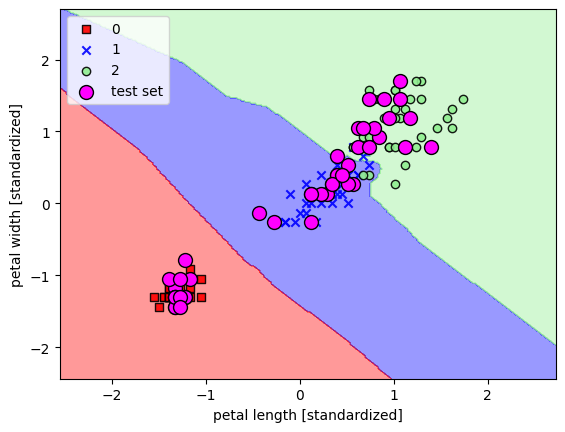

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric='minkowski')
#Minkowski distance is the generalization of Euclid, manhattan and other higher order distances - ( Σ|vector1i – vector2i|p )1/p
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

-2.555787268814562 -2.438387213510368


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


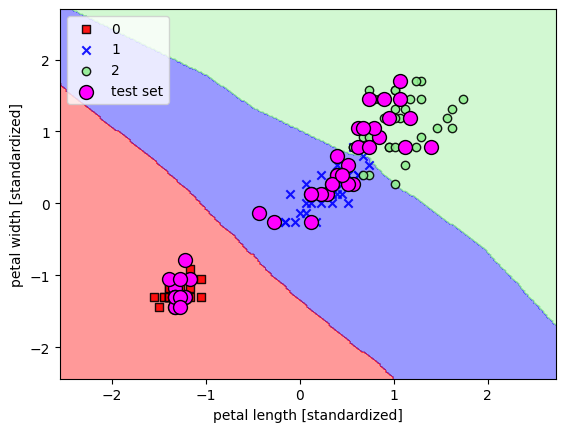

In [50]:
#Taking 10 nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 10, p = 2, metric='minkowski')
#Minkowski distance is the generalization of Euclid, manhattan and other higher order distances - ( Σ|vector1i – vector2i|p )1/p
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

The performance of classifier with 5 and 10 nearest neighbors is quite similar , let us try with very small number of neighbors

-2.555787268814562 -2.438387213510368


<ipython-input-13-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


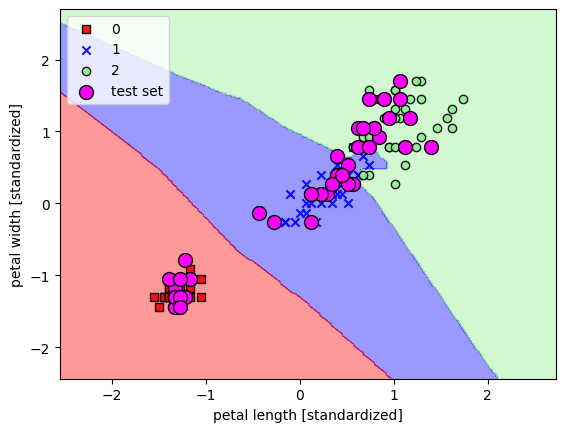

In [52]:
knn = KNeighborsClassifier(n_neighbors = 1, p = 2, metric='minkowski')
#Minkowski distance is the generalization of Euclid, manhattan and other higher order distances - ( Σ|vector1i – vector2i|p )1/p
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Still it is learn decision boundary well,but there is too much overfitting since it is relying on the nearest neighbor alone and there is no smoothing effect due to averaging taking place.

The right choice of k plays a crucial role in determination of overfitting or not . Also ,the distance metric is to be adjusted based on applications. For real-valued applications, it is better to use Euclidean distance with standardization.

****CURSE OF DIMENSIONALITY**** \
In algorithms like knn or decision trees which are non-parametric and there is no regularization to add in cost function, dimensionality becomes a problem . With an increase in number of features, for a fixed number of training set, the feature space is sparser and it becomes harder to find the underlying manifold pattern and the algorithm starts overfitting quickly leading to bad performance on test-set. \
Intuitively, we can think of even the closest neighbors being too far away in a high-dimensional space to give a good estimate. \
We use feature selection and dimensionality reduction to reduce the number of features to include the useful features thereby introducing regularization into the model.

We have a diverse set of algorithms to choose from with their limitaions and advantages , but in the end, no matter what the algorithm, it is the quality and quantity of data which matters to achieve the business goals in machine learning.